In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from plotly import __version__
print(__version__)

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

init_notebook_mode(connected = True)
cf.go_offline()

4.5.2


In [2]:
def plot_category_csv(file = 'Toilet Paper_AMAZON.csv',  cutoff_year = 2020):
    df_comp = pd.read_csv(file)
    df_comp['date'] = pd.to_datetime(df_comp['date'])
    df_comp.set_index('date', inplace = True)
    df_comp = df_comp.loc[df_comp.index.year >= cutoff_year]
    
    # Data cleaning
    df_comp.fillna(method='ffill', inplace=True)
    df_comp = df_comp.apply(lambda col:col/col[col.isna()==False][0])  # Standardization
    df_comp['average'] = df_comp.mean(axis=1)
    
    df_comp['average'].iplot()
    
    df_comp.to_csv("average_data/"+file[11:-4]+'_average.csv')

In [4]:
keyword_list = ['N95 Mask','hand sanitizer','disinfectant spray','disinfectant wipes','olive oil',\
                'canned soup','rice','instant noodles','bottled water','hair color','hair clipper',\
                'shampoo','trash bag','toilet paper','dumbbell','yoga mat','nintendo switch',\
                'pet supply','printer ink']

In [5]:
for keyword in keyword_list:
    plot_category_csv('v1data/'+keyword+'_AMAZON.csv')

In [6]:
df_comb = pd.read_csv('combined_data/rescaled.csv')

df_comb['date'] = pd.to_datetime(df_comb['date'])
df_comb.set_index('date', inplace = True)

df_comb.head()

,price,trend,category,group
date,,,,
2020-01-01,1.000000,0.913833,Toilet Paper,Personal Care/Household
2020-01-02,1.000000,0.913833,Toilet Paper,Personal Care/Household
2020-01-03,1.000000,0.913833,Toilet Paper,Personal Care/Household
2020-01-04,1.013167,0.913833,Toilet Paper,Personal Care/Household
2020-01-05,0.997252,0.913833,Toilet Paper,Personal Care/Household


In [7]:
df_comp_price = df_comb.pivot(columns='category', values='price')
df_corr_price = df_comp_price.corr()
df_corr_price.index.name = None
df_corr_price.columns.name = None

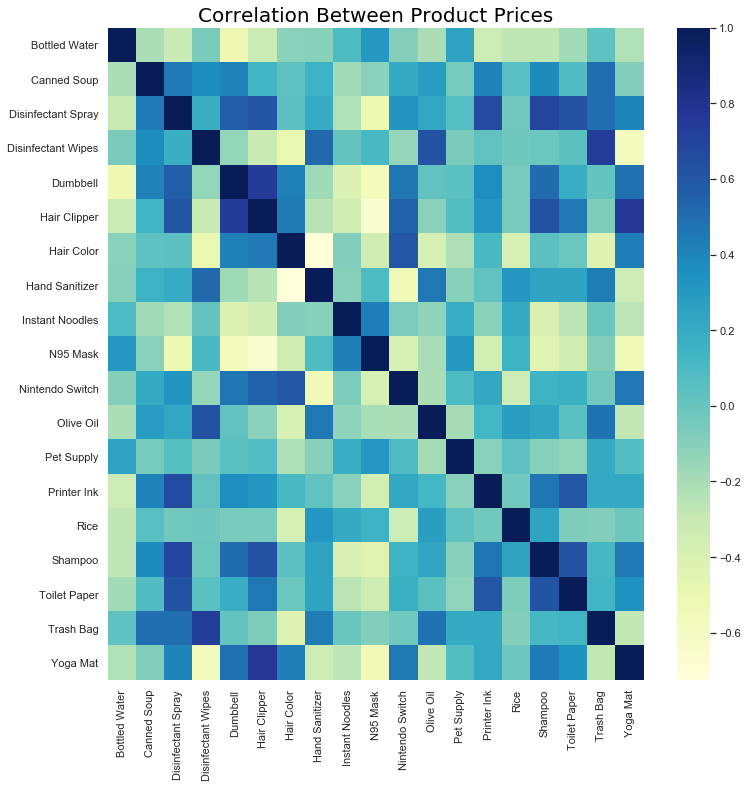

In [9]:
plt.figure(figsize=(12,12))

font = {'family': 'helvetica',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Correlation Between Product Prices', fontdict=font)
hm_price = sns.heatmap(df_corr_price, cmap='YlGnBu')

hm_price.get_figure().savefig("Heatmap_Between_Products_price.png")

In [10]:
df_comp_trend = df_comb.pivot(columns='category', values='trend')
df_corr_trend = df_comp_trend.corr()
df_corr_trend.index.name = None
df_corr_trend.columns.name = None

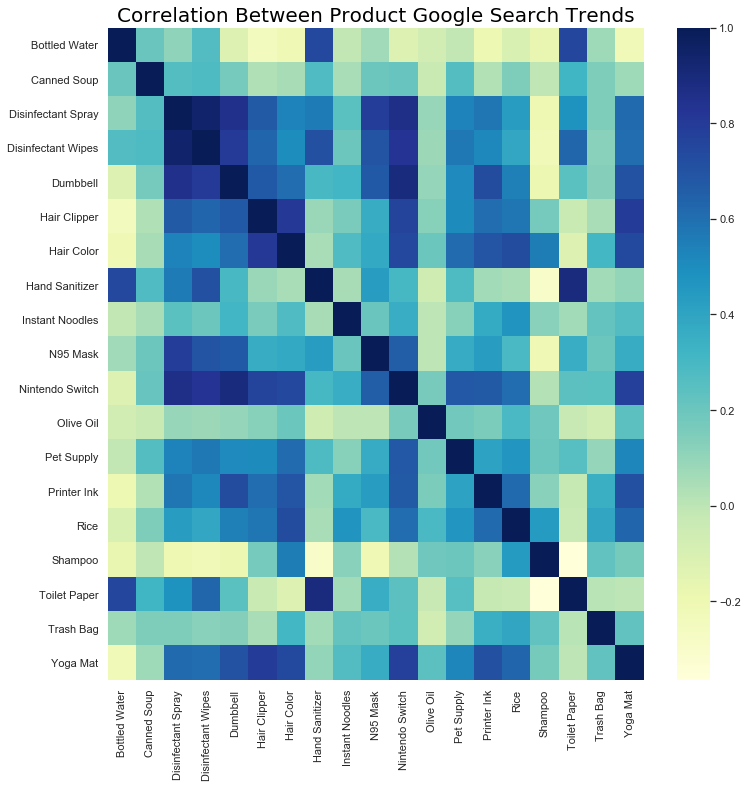

In [12]:
plt.figure(figsize=(12,12))

font = {'family': 'helvetica',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Correlation Between Product Google Search Trends', fontdict=font)

hm_trend = sns.heatmap(df_corr_trend, cmap='YlGnBu')

hm_trend.get_figure().savefig("Heatmap_Between_Products_trend.png")

In [15]:
df_oos = pd.read_csv('combined_data/out_of_stock_pct.csv')
df_oos['date'] = pd.to_datetime(df_oos['date'])
df_oos.set_index('date', inplace = True)
df_oos.head()

,N95 Mask,hand sanitizer,disinfectant spray,disinfectant wipes,olive oil,canned soup,rice,instant noodles,bottled water,hair color,hair clipper,shampoo,trash bag,toilet paper,dumbbell,yoga mat,nintendo switch,pet supply,printer ink
date,,,,,,,,,,,,,,,,,,,
2020-01-01,0.3,0.5,0.3,0.1,0.0,NaN,0.2,0.444444,0.6,0.1,0.2,0.0,0.7,0.0,0.4,0.3,0.2,0.6,0.4
2020-01-02,0.3,0.5,0.4,0.1,0.1,NaN,0.3,0.444444,0.6,0.1,0.2,0.0,0.7,0.0,0.4,0.3,0.2,0.6,0.4
2020-01-03,0.3,0.5,0.3,0.1,0.0,NaN,0.3,0.444444,0.6,0.1,0.2,0.0,0.7,0.0,0.4,0.3,0.2,0.6,0.4
2020-01-04,0.3,0.5,0.3,0.1,0.0,NaN,0.3,0.444444,0.6,0.2,0.2,0.0,0.7,0.0,0.4,0.3,0.2,0.6,0.4
2020-01-05,0.3,0.5,0.3,0.1,0.0,NaN,0.3,0.444444,0.6,0.2,0.2,0.0,0.7,0.0,0.4,0.3,0.2,0.7,0.4


In [16]:
df_oos_corr = df_oos.corr()
df_oos_corr.index.name = None
df_oos_corr.columns.name = None
df_oos_corr.head()

,N95 Mask,hand sanitizer,disinfectant spray,disinfectant wipes,olive oil,canned soup,rice,instant noodles,bottled water,hair color,hair clipper,shampoo,trash bag,toilet paper,dumbbell,yoga mat,nintendo switch,pet supply,printer ink
N95 Mask,1.000000,0.000842,0.279990,-0.065252,0.060157,NaN,-0.247076,0.194668,-0.021636,-0.005480,-0.048939,-0.179197,0.011838,-0.000413,-0.294038,-0.030133,-0.307911,0.104536,-0.044451
hand sanitizer,0.000842,1.000000,0.251593,0.655468,0.264381,NaN,-0.151567,0.351155,0.210592,-0.066468,0.323500,-0.217505,0.088057,0.461506,0.467007,0.415958,-0.009437,-0.077506,-0.379003
disinfectant spray,0.279990,0.251593,1.000000,0.112155,0.274696,NaN,0.076983,0.516201,0.033247,-0.410602,0.245463,-0.274758,-0.063515,0.358316,0.049465,0.482312,-0.052779,-0.069681,-0.313980
disinfectant wipes,-0.065252,0.655468,0.112155,1.000000,0.341400,NaN,-0.264029,0.425968,0.376668,-0.042641,0.453672,-0.296103,0.187529,0.568325,0.570399,0.370661,0.098761,-0.058957,-0.720108
olive oil,0.060157,0.264381,0.274696,0.341400,1.000000,NaN,-0.212880,0.420614,-0.120448,-0.210216,0.218626,-0.253964,-0.023098,0.244872,-0.087743,0.158739,-0.032245,-0.115700,-0.375053


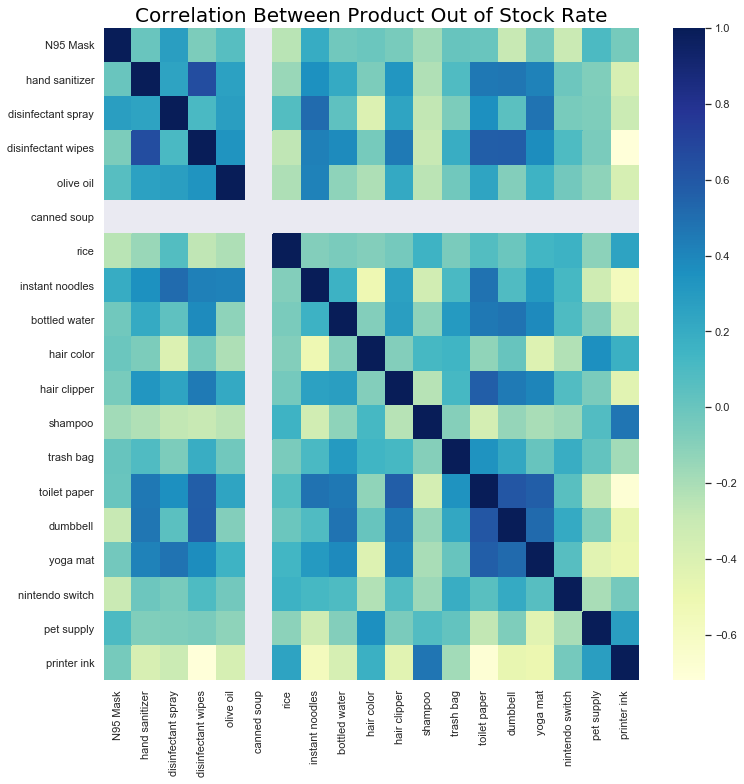

In [17]:
plt.figure(figsize=(12,12))

font = {'family': 'helvetica',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

plt.title('Correlation Between Product Out of Stock Rate', fontdict=font)

hm_oos = sns.heatmap(df_oos_corr, cmap='YlGnBu')

hm_oos.get_figure().savefig("Heatmap_Between_Products_Out_of_Stock_Rate.png")